# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 1 - Regresión Logística
# Notebook #3: Implementación de un modelo MLP
En esta notebook se busca aprovechar los conocimientos de las anteriores e implementar un modelo MLP para poder estimar la condición de diabético de un paciente, perteneciente al Pima Indians Dataset analizado en la primer notebook.

# 1. Cargando base de datos

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import importlib

In [4]:
# Read database from .csv
df = pd.read_csv('../../databases/diabetes.csv', delimiter=',')

# Show first rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Preprocesamiento de los datos

## 2.1 Filtrado de valores inválidos

In [5]:
# Filtering Glucose values
df['Glucose'].replace(0, np.nan, inplace=True)

# Filtering Blood Pressure values
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Filtering Skin Thickness values
df['SkinThickness'].replace(0, np.nan, inplace=True)

# Filtering Insulin values
df['Insulin'].replace(0, np.nan, inplace=True)

# Filtering Body Mass Index values
df['BMI'].replace(0, np.nan, inplace=True)

## 2.2 Remoción de Outliers

In [6]:
from src.helper import remove_outliers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [7]:
x_labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
y_labels = ['Outcome']

for column in x_labels:
    remove_outliers(df, column)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,763.000000,719.000000,538.000000,370.000000,749.000000,739.000000,759.000000,768.000000
mean,3.786649,121.686763,72.115438,28.903346,132.610811,32.204005,0.429832,32.805007,0.348958
std,3.278714,30.535641,11.239072,9.865480,74.285393,6.491385,0.249684,11.113182,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,75.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,120.000000,32.000000,0.356000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,177.500000,36.500000,0.587000,40.000000,1.000000
max,13.000000,199.000000,104.000000,56.000000,360.000000,50.000000,1.191000,66.000000,1.000000


# 3. Separación del conjunto de entrenamiento y evaluación

In [8]:
from sklearn import model_selection

In [9]:
from sklearn import preprocessing

In [10]:
# Define input and output variables for the model
df_x = df[x_labels]
df_y = df[y_labels]

In [11]:
# Split the dataset into train_valid and test
x_train_valid, x_test, y_train_valid, y_test = model_selection.train_test_split(df_x, df_y, test_size=0.2, random_state=5, shuffle=True) #rs=15

# Split the train_valid sub-dataset into train and valid
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train_valid, y_train_valid, test_size=0.3, random_state=27, shuffle=True) #rs=23

In [12]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,428.000000,427.000000,394.000000,297.000000,205.000000,416.000000,417.000000,424.000000
mean,3.740654,123.133489,71.685279,28.434343,135.268293,31.721635,0.415094,33.089623
std,3.241350,31.324119,11.248859,9.808809,73.920806,6.297409,0.245358,11.580390
min,0.000000,56.000000,44.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,21.000000,76.000000,27.300000,0.237000,24.000000
50%,3.000000,119.000000,72.000000,28.000000,126.000000,31.600000,0.334000,29.000000
75%,6.000000,143.000000,78.000000,35.000000,180.000000,35.400000,0.580000,40.000000
max,13.000000,197.000000,102.000000,54.000000,342.000000,49.300000,1.191000,66.000000


# 4. Reemplazo de valores inválidos

In [13]:
# Compute the mean of training
train_means = x_train.mean().to_numpy()

# Replacing nan values of the train dataset with training mean values
for index, column in enumerate(x_train.columns):
    x_train.loc[:,column].replace(np.nan, train_means[index], inplace=True)

# Replacing nan values of the test dataset with training mean values
for index, column in enumerate(x_test.columns):
    x_test.loc[:,column].replace(np.nan, train_means[index], inplace=True)
    
# Replacing nan values of the test dataset with training mean values
for index, column in enumerate(x_valid.columns):
    x_valid.loc[:,column].replace(np.nan, train_means[index], inplace=True)

c:\users\joaco\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,3.740654,123.133489,71.685279,28.434343,135.268293,31.721635,0.415094,33.089623
std,3.237562,31.250846,10.779109,8.157184,51.034033,6.201033,0.241894,11.512548
min,0.000000,56.000000,44.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,65.000000,24.000000,130.000000,27.400000,0.238000,24.000000
50%,3.000000,119.000000,71.685279,28.434343,135.268293,31.721635,0.342000,29.000000
75%,6.000000,143.000000,78.000000,32.000000,135.268293,35.200000,0.569000,40.000000
max,13.000000,197.000000,102.000000,54.000000,342.000000,49.300000,1.191000,66.000000


# 5. Normalización de datos de entrada. Z Score. 

In [15]:
# IMPORTANT! Backup unnormalized subsets for further utilization
x_train_un = x_train
x_valid_un = x_valid
x_test_un = x_test

# Apply z-score to all sub-datasets
scalable_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

if scalable_variables:
    # Create an instance of the StandardScaler for each variable
    scaler = preprocessing.StandardScaler()

    # Fit the distribution
    scaler.fit(x_train.loc[:, scalable_variables])

    # Transform and normalize all variables
    x_train.loc[:, scalable_variables] = scaler.transform(x_train.loc[:, scalable_variables])
    x_test.loc[:, scalable_variables] = scaler.transform(x_test.loc[:, scalable_variables])
    x_valid.loc[:, scalable_variables] = scaler.transform(x_valid.loc[:, scalable_variables])

c:\users\joaco\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\joaco\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
c:\users\joaco\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [16]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,429.000000,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02
mean,0.000000,1.573463e-16,6.211038e-17,2.794967e-16,-9.316557e-17,4.523706e-16,-1.594166e-16,-1.873663e-16
std,1.001168,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00
min,-1.156741,-2.150722e+00,-2.571419e+00,-2.630733e+00,-2.359381e+00,-2.183091e+00,-1.395186e+00,-1.051352e+00
25%,-0.847506,-7.411159e-01,-6.209311e-01,-5.442467e-01,-1.033515e-01,-6.977354e-01,-7.329671e-01,-7.904623e-01
50%,-0.229036,-1.324225e-01,0.000000e+00,4.360404e-16,0.000000e+00,5.735917e-16,-3.025246e-01,-3.556465e-01
75%,0.698669,6.364533e-01,5.865135e-01,4.376289e-01,0.000000e+00,5.615881e-01,6.369989e-01,6.009482e-01
max,2.863314,2.366424e+00,2.815642e+00,3.137787e+00,4.055589e+00,2.838057e+00,3.211376e+00,2.861990e+00


# 6. Multi Layer Perceptron (MLP) - Test #1

In [17]:
# Loading TensorBoard for learning logging
%load_ext tensorboard

In [18]:
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.metrics import SensitivityAtSpecificity
from keras.callbacks import TensorBoard, ModelCheckpoint
import datetime

In [19]:
units_per_layer = 3
hidden_layers = 2
input_dim = 8
dropout_prob = 0
# Define MLP model
mlp_model = Sequential()
for layer in range(hidden_layers):
    mlp_model.add(Dense(units_per_layer, input_shape=(input_dim,), activation='relu', use_bias=True))
    mlp_model.add(Dropout(dropout_prob))
mlp_model.add(Dense(1, activation='sigmoid', use_bias=True)) # Output layer

In [20]:
# Compiling model
mlp_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['AUC'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 27        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [21]:
#mlp_model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), shuffle=True, epochs=200, batch_size=32, verbose=0)

In [22]:
from src import mlp_helper
from src.mlp_helper import create_model, run_model
importlib.reload(mlp_helper);

In [23]:
model = create_model(hidden_layers=4,
                    units_per_layer=4,
                    hidden_layer_activation='tanh',
                    regularizer=None,
                    regularizer_lambda=1e-10,
                    dropout_rate=0.0,
                    use_batch_normalization=False)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Ejemplo #1 - ¿Qué significa area bajo la curva ROC en 0.5?
Arrancamos con un modelo básico con una sola capa oculta, con dos neuronas al mismo nivel.

Model logs @ tb-logs/mlp/20210530-160916
Model checkpoints @ checkpoints/mlp/20210530-160916
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


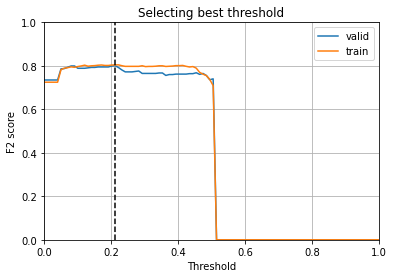

------------------- Main metric -------------------
[AUC] Train: 0.8043 - Valid: 0.7975 - Test: 0.8363
---------------- Secondary metrics ----------------
[PPV] Train: 0.5409 - Valid: 0.5579 - Test: 0.5802
[NPV] Train: 0.8612 - Valid: 0.8556 - Test: 0.9041
[SEN] Train: 0.8041 - Valid: 0.8030 - Test: 0.8704
[SPE] Train: 0.6406 - Valid: 0.6471 - Test: 0.6600
---------------- Confusion Matrix -----------------
Train: FP = 101 - TP = 119 - FN = 29 - TN = 180
Valid: FP = 42 - TP = 53 - FN = 13 - TN = 77
Test: FP = 34 - TP = 47 - FN = 7 - TN = 66
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8010 @ threhsold = 0.2121


In [24]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0,
                                            beta_2=0,
                                            learning_rate=1.0,
                                            decay_rate=0.5,
                                            batch_size=64,
                                            epochs=200,
                                            patience=20,
                                            min_delta=0.001,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=1,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-4,
                                            dropout_rate=0.0,
                                            use_batch_normalization=False)

In [25]:
# TensorBoard launch
%tensorboard --logdir tb-logs/mlp/

Reusing TensorBoard on port 6006 (pid 28024), started 0:19:54 ago. (Use '!kill 28024' to kill it.)

## Ejemplo #2 - SGD es bueno, pero Adam mucho mejor
Veamos que este es el caso óptimo. Si cambio el learning rate se rompe. El momentum está **al máximo**. Esto significa, a priori, la posible presencia de un plató en donde arranca a optimizar. Seguimos con un modelo simple de dos neuronas en una misma capa oculta.

Model checkpoints @ checkpoints/mlp/20210530-160920
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:71: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_train = tp_train / (fp_train + tp_train)
C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:72: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_valid = tp_valid / (fp_valid + tp_valid)
C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_test = tp_test / (fp_test + tp_test)


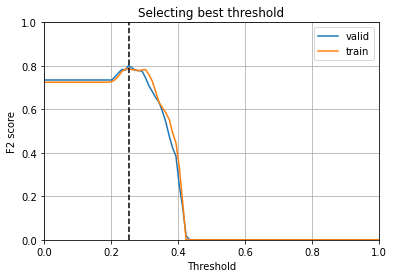

------------------- Main metric -------------------
[AUC] Train: 0.8148 - Valid: 0.7797 - Test: 0.8620
---------------- Secondary metrics ----------------
[PPV] Train: nan - Valid: nan - Test: nan
[NPV] Train: 0.6550 - Valid: 0.6432 - Test: 0.6494
[SEN] Train: 0.0000 - Valid: 0.0000 - Test: 0.0000
[SPE] Train: 1.0000 - Valid: 1.0000 - Test: 1.0000
---------------- Confusion Matrix -----------------
Train: FP = 0 - TP = 0 - FN = 148 - TN = 281
Valid: FP = 0 - TP = 0 - FN = 66 - TN = 119
Test: FP = 0 - TP = 0 - FN = 54 - TN = 100
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8020 @ threhsold = 0.2525


In [26]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='sgd',
                                            loss='binary_crossentropy',
                                            momentum=1,
                                            rho=0,
                                            beta_1=0,
                                            beta_2=0,
                                            learning_rate=0.1,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=20,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer=None,
                                            regularizer_lambda=1e-4,
                                            dropout_rate=0.0,
                                            use_batch_normalization=False)

## Ejemplo #3 - ¿Qué onda con Adam?
Vemos que en este caso, Adam produce resultados MUY superiores, variando el momentum entre sus extremos.

Model checkpoints @ checkpoints/mlp/20210530-160923
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


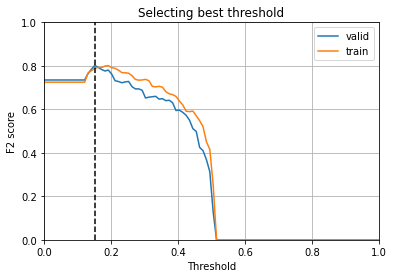

------------------- Main metric -------------------
[AUC] Train: 0.8270 - Valid: 0.7874 - Test: 0.8778
---------------- Secondary metrics ----------------
[PPV] Train: 0.8036 - Valid: 0.7368 - Test: 0.8333
[NPV] Train: 0.7239 - Valid: 0.6867 - Test: 0.7132
[SEN] Train: 0.3041 - Valid: 0.2121 - Test: 0.2778
[SPE] Train: 0.9609 - Valid: 0.9580 - Test: 0.9700
---------------- Confusion Matrix -----------------
Train: FP = 11 - TP = 45 - FN = 103 - TN = 270
Valid: FP = 5 - TP = 14 - FN = 52 - TN = 114
Test: FP = 3 - TP = 15 - FN = 39 - TN = 97
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8020 @ threhsold = 0.1515


In [27]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0.0,
                                            beta_2=0.0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=20,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer=None,
                                            regularizer_lambda=1e-4,
                                            dropout_rate=0.0,
                                            use_batch_normalization=False)

## Ejemplo #4 - Ahora ponemos L2 y un poco de dropout
Además se aumentó un poco el **momentum**

Model checkpoints @ checkpoints/mlp/20210530-160926
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 18        
_________________________________________________________________
dropout (Dropout)            (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


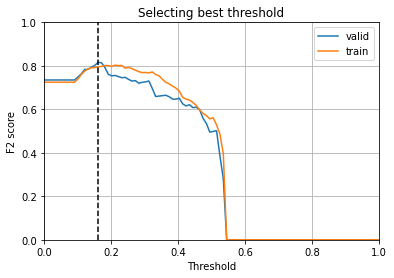

------------------- Main metric -------------------
[AUC] Train: 0.8282 - Valid: 0.7916 - Test: 0.8809
---------------- Secondary metrics ----------------
[PPV] Train: 0.6810 - Valid: 0.6327 - Test: 0.8000
[NPV] Train: 0.7796 - Valid: 0.7426 - Test: 0.8070
[SEN] Train: 0.5338 - Valid: 0.4697 - Test: 0.5926
[SPE] Train: 0.8683 - Valid: 0.8487 - Test: 0.9200
---------------- Confusion Matrix -----------------
Train: FP = 37 - TP = 79 - FN = 69 - TN = 244
Valid: FP = 18 - TP = 31 - FN = 35 - TN = 101
Test: FP = 8 - TP = 32 - FN = 22 - TN = 92
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8163 @ threhsold = 0.1616


In [28]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.01,
                                            rho=0,
                                            beta_1=0.0,
                                            beta_2=0.0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.15,
                                            use_batch_normalization=False)

## Ejemplo #5 - Caso límite: ¿Qué pasa si usamos probabilida de dropout = 1?
En ese caso, caen todas las neuronas. Por ende, el modelo predicirá la solución trivial.

Model checkpoints @ checkpoints/mlp/20210530-160929
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2)                 18        
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:71: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_train = tp_train / (fp_train + tp_train)
C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:72: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_valid = tp_valid / (fp_valid + tp_valid)
C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_test = tp_test / (fp_test + tp_test)


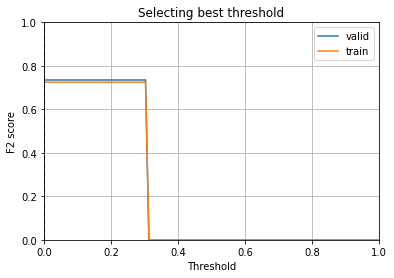

------------------- Main metric -------------------
[AUC] Train: 0.5981 - Valid: 0.6608 - Test: 0.6061
---------------- Secondary metrics ----------------
[PPV] Train: nan - Valid: nan - Test: nan
[NPV] Train: 0.6550 - Valid: 0.6432 - Test: 0.6494
[SEN] Train: 0.0000 - Valid: 0.0000 - Test: 0.0000
[SPE] Train: 1.0000 - Valid: 1.0000 - Test: 1.0000
---------------- Confusion Matrix -----------------
Train: FP = 0 - TP = 0 - FN = 148 - TN = 281
Valid: FP = 0 - TP = 0 - FN = 66 - TN = 119
Test: FP = 0 - TP = 0 - FN = 54 - TN = 100
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7350 @ threhsold = 0.0000


In [29]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.01,
                                            rho=0,
                                            beta_1=0.0,
                                            beta_2=0.0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.999,
                                            use_batch_normalization=False)

## Ejemplo #6 - Sacamos Dropout y ponemos Batch Normalization
Al mejor modelo obtenido hasta ahora, se le cambia dropout por batch normalization. Vemos que no existe mejora en el modelo.

Model checkpoints @ checkpoints/mlp/20210530-160932
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 18        
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
Total params: 29
Trainable params: 25
Non-trainable params: 4
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


C:\Users\Joaco\Desktop\TP2 Redes Neuronales\nn-tp2\notebooks\ej1\src\helper.py:73: RuntimeWarning: invalid value encountered in longlong_scalars
  ppv_test = tp_test / (fp_test + tp_test)


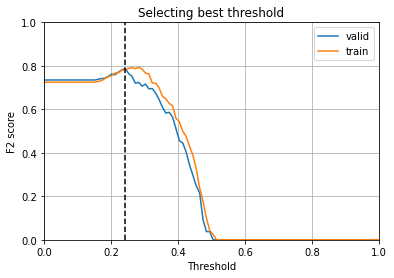

------------------- Main metric -------------------
[AUC] Train: 0.8326 - Valid: 0.7851 - Test: 0.8911
---------------- Secondary metrics ----------------
[PPV] Train: 0.8000 - Valid: 1.0000 - Test: nan
[NPV] Train: 0.6604 - Valid: 0.6467 - Test: 0.6494
[SEN] Train: 0.0270 - Valid: 0.0152 - Test: 0.0000
[SPE] Train: 0.9964 - Valid: 1.0000 - Test: 1.0000
---------------- Confusion Matrix -----------------
Train: FP = 1 - TP = 4 - FN = 144 - TN = 280
Valid: FP = 0 - TP = 1 - FN = 65 - TN = 119
Test: FP = 0 - TP = 0 - FN = 54 - TN = 100
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7882 @ threhsold = 0.2424


In [30]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.01,
                                            rho=0,
                                            beta_1=0.0,
                                            beta_2=0.0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.0,
                                            use_batch_normalization=True)

## Ejemplo #7 - Cambio en la función de activación, manteniendo el mejor modelo.
En teoría, la tangente hiperbólica es mejor que la sigmoidea. Provee una convergencia más rápida.

Model checkpoints @ checkpoints/mlp/20210530-160935
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 2)                 18        
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


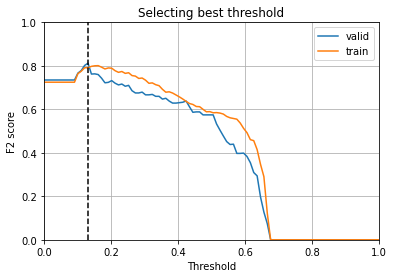

------------------- Main metric -------------------
[AUC] Train: 0.8269 - Valid: 0.7816 - Test: 0.8793
---------------- Secondary metrics ----------------
[PPV] Train: 0.6614 - Valid: 0.6379 - Test: 0.7556
[NPV] Train: 0.7881 - Valid: 0.7717 - Test: 0.8165
[SEN] Train: 0.5676 - Valid: 0.5606 - Test: 0.6296
[SPE] Train: 0.8470 - Valid: 0.8235 - Test: 0.8900
---------------- Confusion Matrix -----------------
Train: FP = 43 - TP = 84 - FN = 64 - TN = 238
Valid: FP = 21 - TP = 37 - FN = 29 - TN = 98
Test: FP = 11 - TP = 34 - FN = 20 - TN = 89
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8122 @ threhsold = 0.1313


In [31]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.01,
                                            rho=0,
                                            beta_1=0.0,
                                            beta_2=0.0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='tanh',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.15,
                                            use_batch_normalization=False)

Por otro lado, se prueba la **Leaky ReLU**.

Model checkpoints @ checkpoints/mlp/20210530-160938
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2)                 18        
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


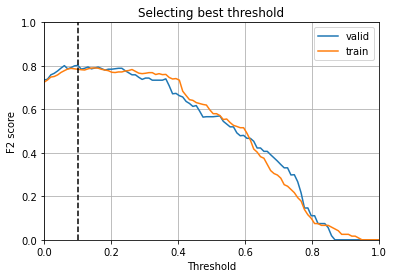

------------------- Main metric -------------------
[AUC] Train: 0.8321 - Valid: 0.8130 - Test: 0.8772
---------------- Secondary metrics ----------------
[PPV] Train: 0.7119 - Valid: 0.6667 - Test: 0.7447
[NPV] Train: 0.7942 - Valid: 0.7710 - Test: 0.8224
[SEN] Train: 0.5676 - Valid: 0.5455 - Test: 0.6481
[SPE] Train: 0.8790 - Valid: 0.8487 - Test: 0.8800
---------------- Confusion Matrix -----------------
Train: FP = 34 - TP = 84 - FN = 64 - TN = 247
Valid: FP = 18 - TP = 36 - FN = 30 - TN = 101
Test: FP = 12 - TP = 35 - FN = 19 - TN = 88
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8020 @ threhsold = 0.1010


In [32]:
from keras.layers import LeakyReLU
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.01,
                                            rho=0,
                                            beta_1=0.0,
                                            beta_2=0.0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation=LeakyReLU(alpha=0.04),
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.15,
                                            use_batch_normalization=False)

## Ejemplo #8 - Cambio en la topología de la red

Model checkpoints @ checkpoints/mlp/20210530-160941
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
de

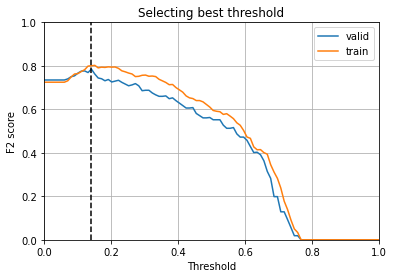

------------------- Main metric -------------------
[AUC] Train: 0.8312 - Valid: 0.7828 - Test: 0.8787
---------------- Secondary metrics ----------------
[PPV] Train: 0.6617 - Valid: 0.6364 - Test: 0.7143
[NPV] Train: 0.7973 - Valid: 0.7615 - Test: 0.8190
[SEN] Train: 0.5946 - Valid: 0.5303 - Test: 0.6481
[SPE] Train: 0.8399 - Valid: 0.8319 - Test: 0.8600
---------------- Confusion Matrix -----------------
Train: FP = 45 - TP = 88 - FN = 60 - TN = 236
Valid: FP = 20 - TP = 35 - FN = 31 - TN = 99
Test: FP = 14 - TP = 35 - FN = 19 - TN = 86
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7848 @ threhsold = 0.1414


In [33]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.1,
                                            rho=0.4,
                                            beta_1=0.99,
                                            beta_2=0.99,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=3,
                                            units_per_layer=10,
                                            hidden_layer_activation='tanh',
                                            regularizer='l2',
                                            regularizer_lambda=1e-2,
                                            dropout_rate=0.15,
                                            use_batch_normalization=False)

Model checkpoints @ checkpoints/mlp/20210530-160945
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________
(429, 8) (429, 1)
(185, 8) (185, 1)
(154, 8) (154, 1)


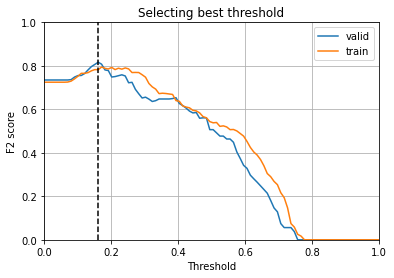

------------------- Main metric -------------------
[AUC] Train: 0.8312 - Valid: 0.8056 - Test: 0.8862
---------------- Secondary metrics ----------------
[PPV] Train: 0.7103 - Valid: 0.7381 - Test: 0.7727
[NPV] Train: 0.7764 - Valid: 0.7552 - Test: 0.8182
[SEN] Train: 0.5135 - Valid: 0.4697 - Test: 0.6296
[SPE] Train: 0.8897 - Valid: 0.9076 - Test: 0.9000
---------------- Confusion Matrix -----------------
Train: FP = 31 - TP = 76 - FN = 72 - TN = 250
Valid: FP = 11 - TP = 31 - FN = 35 - TN = 108
Test: FP = 10 - TP = 34 - FN = 20 - TN = 90
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8166 @ threhsold = 0.1616


In [34]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.1,
                                            rho=0.0,
                                            beta_1=0.99,
                                            beta_2=0.99,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=2000,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=False,
                                            summary_on=True,
                                            hidden_layers=2,
                                            units_per_layer=50,
                                            hidden_layer_activation='tanh',
                                            regularizer='l1',
                                            regularizer_lambda=1e-2,
                                            dropout_rate=0.2,
                                            use_batch_normalization=False)